##Step 1: Importing the libraries

In [1]:
# Importing the libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

import sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score

##Step 2: Reading Data and Data Understanding 

In [2]:
# Reading the dataset

bike_dt = pd.read_csv('day.csv')
bike_dt.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Looking into the dataset for total number of columns and rows

bike_dt.shape

(730, 16)

In [4]:
# Checking the information of the dataset

bike_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
#checking the descriptive statistics of the dataset

bike_dt.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
#checking the columns of the dataset
bike_dt.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
#checking the data types of each column of the dataset
bike_dt.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

##Step 3: Data Cleaning

In [8]:
#Removing duplicates if present in data

bike_dt.drop_duplicates(subset = None, inplace = True)
bike_dt.shape

(730, 16)

In [9]:
# Checking value distribution of season column

bike_dt['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [10]:
#from the data looks like Season,month,weathersit,weekday have numerical data
#so lets convert season in categorical data and replace it with appropriate data

bike_dt['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
bike_dt.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
# Checking value distribution of weekday column

bike_dt['weekday'].value_counts()

2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64

In [12]:
#lets convert weekday in categorical data and replace it with appropriate data

bike_dt['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",
                         5:"Friday",6:"Saturday"},inplace=True)
bike_dt.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,Monday,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,Tuesday,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,Wednesday,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,Thursday,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,Friday,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [13]:
# Checking value distribution of weathersit column
bike_dt['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [14]:
#converting weathersit in categorical data and replace it with appropriate data

bike_dt['weathersit'] = bike_dt['weathersit'].replace({1:'clear',2:'mist',3:'lightsnow',4:'heavyrain'})
bike_dt

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,Monday,1,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,Tuesday,1,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,Wednesday,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,Thursday,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,Friday,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,spring,1,12,0,Friday,1,mist,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,spring,1,12,0,Saturday,0,mist,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,spring,1,12,0,Sunday,0,mist,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,spring,1,12,0,Monday,1,clear,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [15]:
# Checking value distribution of weekday column

bike_dt['weekday'].value_counts()

Tuesday      105
Monday       105
Saturday     104
Wednesday    104
Friday       104
Thursday     104
Sunday       104
Name: weekday, dtype: int64

In [16]:
#converting weekday in categorical data and replace it with appropriate data

bike_dt['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",
                         5:"Friday",6:"Saturday"},inplace=True)
bike_dt.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,Monday,1,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,Tuesday,1,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,Wednesday,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,Thursday,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,Friday,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [17]:
# Checking value distribution of mnth column

bike_dt['mnth'].value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [18]:
#converting mnth in categorical data and replace it with appropriate data

bike_dt['mnth'].replace({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',
        11:'Nov',12:'Dec'},inplace=True)
bike_dt.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Monday,1,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Tuesday,1,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Wednesday,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Thursday,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Friday,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [19]:
#From the data set we can understand that the 'instant' column is just the serial number so we can drop it.

bike_dt.drop(['instant'],axis=1,inplace=True)

In [20]:
#The 'dteday' column is also of no use to our analysis, so we can drop that column as well

bike_dt.drop(['dteday'],axis=1,inplace=True)

In [21]:
# As 'casual' and 'registered' total sum to 'cnt'. Since cnt is our target variable,so we are dropping casual and registered

bike_dt.drop(['casual','registered'],axis=1,inplace=True)
bike_dt.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Monday,1,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tuesday,1,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wednesday,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thursday,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Friday,1,clear,9.305237,11.46350,43.6957,12.522300,1600


## Step 4: Exploratory Data Analysis

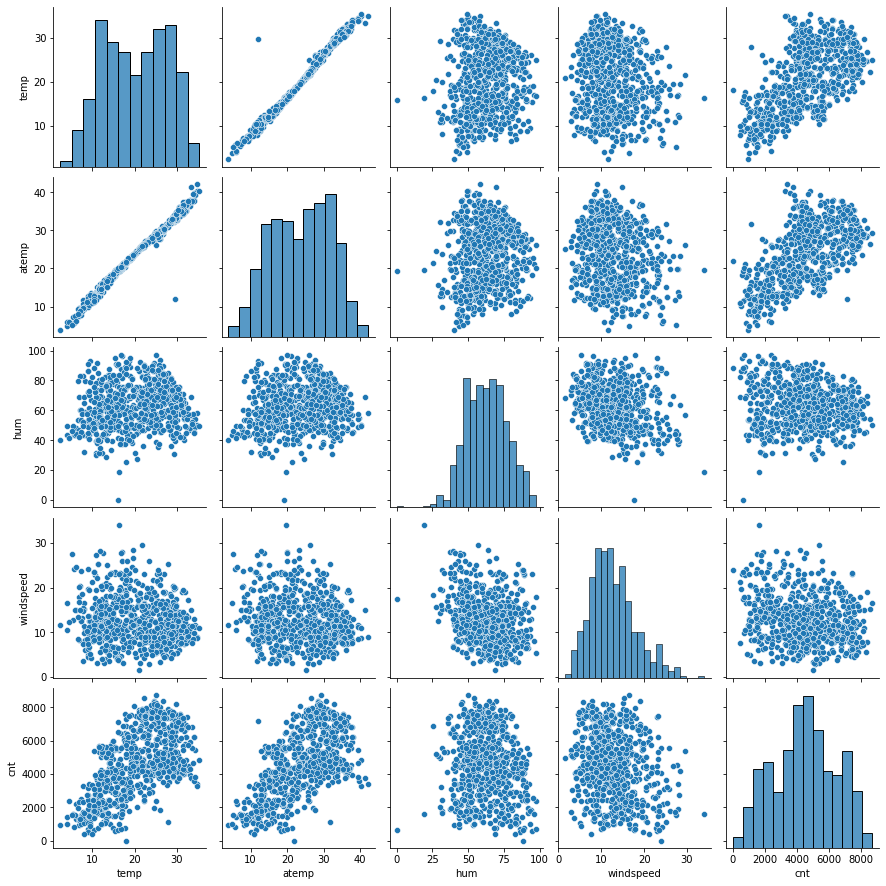

In [22]:
# Lets perform some Analysis on the data by pairplot

sns.pairplot(bike_dt, vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()

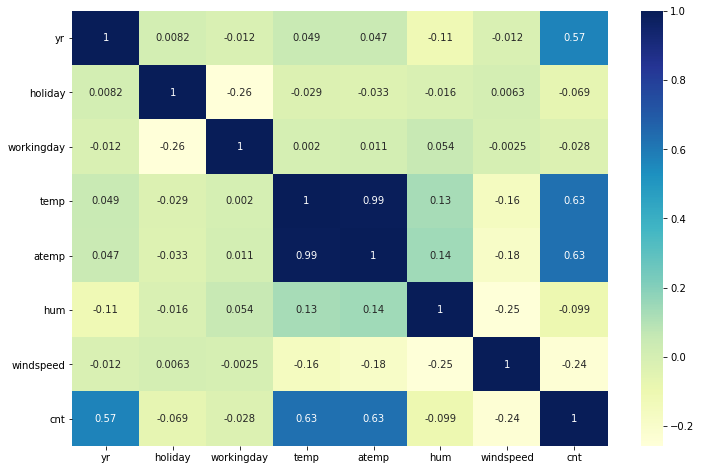

In [23]:
#Lets draw heatmap to check correlation between various features

plt.figure(figsize=(12,8))

sns.heatmap(bike_dt.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [24]:
# here the correlation between 'temp' and 'atemp' is 0.99 and this shows they are highly correlated, So lets drop atemp column

bike_dt.drop(['atemp'],axis=1,inplace=True)
bike_dt.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Monday,1,mist,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tuesday,1,mist,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wednesday,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thursday,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Friday,1,clear,9.305237,43.6957,12.522300,1600


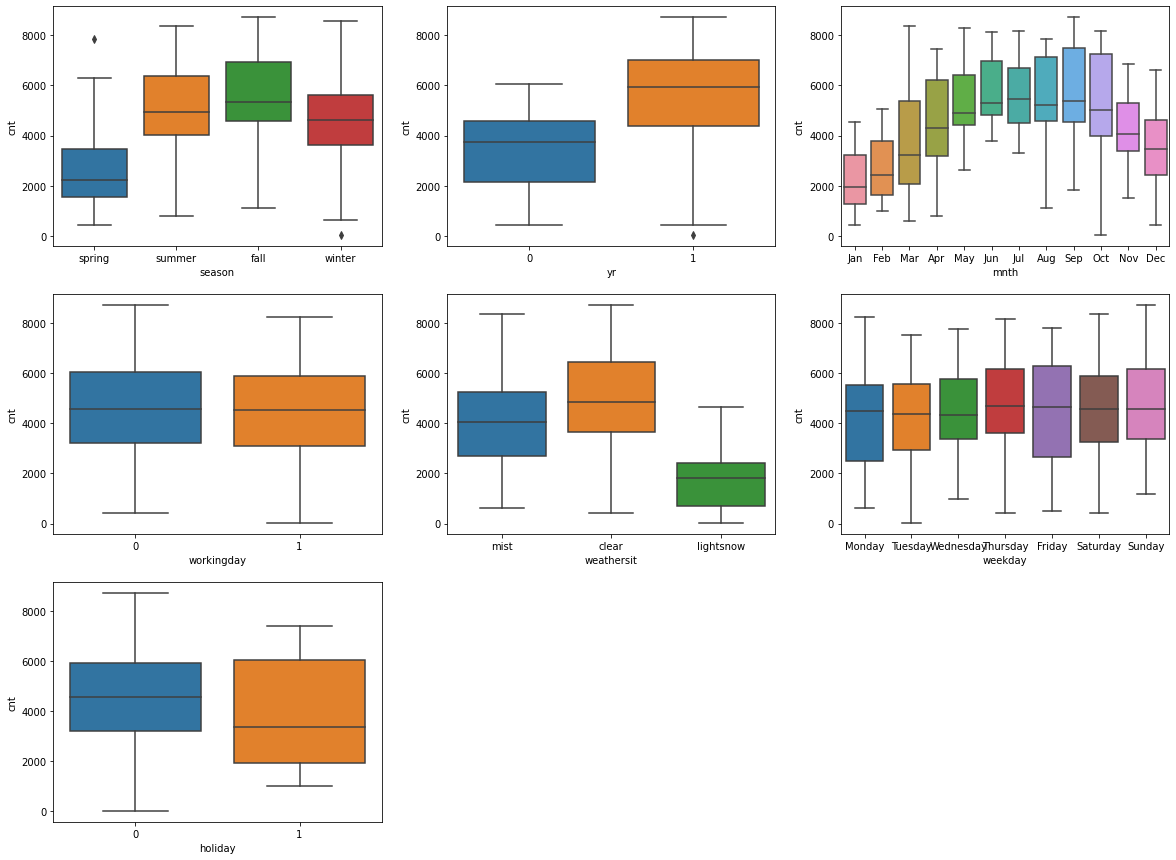

In [25]:
#Visualising categorical Variables to understand data better
#yr','mnth','workingday','weathersit','weekday'

plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_dt)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_dt)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_dt)
plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_dt)
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_dt)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_dt)
plt.subplot(3,3,7)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_dt)
plt.show()

Analysis:
1. From the first plot for variable 'season', we can see that  maximum bookings belong in the 'Fall' season
2. From the Second plot for variable 'yr', Bookings are more in 2019 than 2018
3. in Monthwise comparison in Third plot, we can see the increasing variation from Jan to Sep then Downwarding variation from sep to dec
4. From 5th plot, we can see that when whether is clear demand is obviously high
5. Demand decreased in holidays , we can see in 7th plot
6. 4th and 6th Plot not making clear inferences

####Visualizing numerical variables with target variables

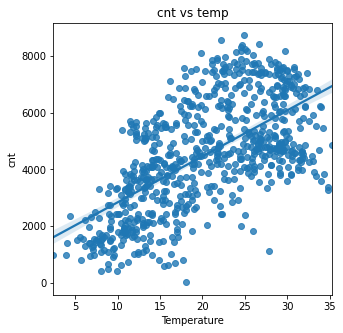

In [26]:
# Variable - temp

plt.figure(figsize=(5,5))
plt.title('cnt vs temp')
sns.regplot(data=bike_dt, y='cnt', x='temp')
plt.xlabel('Temperature')
plt.show()

Analysis - 

a) Demand is positively correlated to the temp.
b) there is linear relationship between cnt and temp

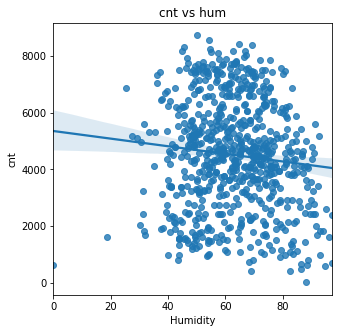

In [27]:
# Variable - hum

plt.figure(figsize=(5,5))
plt.title('cnt vs hum')
sns.regplot(data=bike_dt, y='cnt', x='hum')
plt.xlabel('Humidity')
plt.show()

Analysis - 
a) Values are more scattered.
b) Also, we can see cnt is decreasing with increase in humidity.

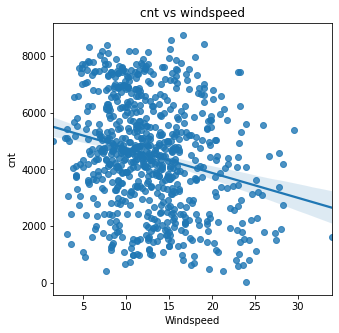

In [28]:
#variable - windspeed
plt.figure(figsize=(5,5))
plt.title('cnt vs windspeed')
sns.regplot(data=bike_dt, y='cnt', x='windspeed')
plt.xlabel('Windspeed')
plt.show()

Analysis - 
a) Values are more scattered.
b) Also, we can see cnt is decreasing with increase in windspeed.

##Step 5: Data Preparation

In [29]:
#Creating Dummies for Categorical Variables

Season_dummy=pd.get_dummies(bike_dt['season'],drop_first=True)
Weather_dummy=pd.get_dummies(bike_dt['weathersit'],drop_first=True)
Day_of_week_dummy=pd.get_dummies(bike_dt['weekday'],drop_first=True)
Month_dummy=pd.get_dummies(bike_dt['mnth'],drop_first=True)

In [30]:
# Concatcnating newly created dummy variable woth dataframe

bike_dt=pd.concat([bike_dt,Season_dummy],axis=1)
bike_dt=pd.concat([bike_dt,Weather_dummy],axis=1)
bike_dt=pd.concat([bike_dt,Day_of_week_dummy],axis=1)
bike_dt=pd.concat([bike_dt,Month_dummy],axis=1)
bike_dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
 11  spring      730 non-null    uint8  
 12  summer      730 non-null    uint8  
 13  winter      730 non-null    uint8  
 14  lightsnow   730 non-null    uint8  
 15  mist        730 non-null    uint8  
 16  Monday      730 non-null    uint8  
 17  Saturday    730 non-null    uint8  
 18  Sunday      730 non-null    uint8  
 19  Thursday    730 non-null    u

In [31]:
#Checking dataset

bike_dt.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter,lightsnow,mist,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,spring,0,Jan,0,Monday,1,mist,14.110847,80.5833,10.749882,985,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,spring,0,Jan,0,Tuesday,1,mist,14.902598,69.6087,16.652113,801,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2,spring,0,Jan,0,Wednesday,1,clear,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Thursday,1,clear,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,spring,0,Jan,0,Friday,1,clear,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [32]:
#Deleting the orginal columns season.weathersit,weekday,mnth

bike_dt.drop(['season'],axis=1,inplace=True)
bike_dt.drop(['weathersit'],axis=1,inplace=True)
bike_dt.drop(['weekday'],axis=1,inplace=True)
bike_dt.drop(['mnth'],axis=1,inplace=True)

bike_dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   hum         730 non-null    float64
 5   windspeed   730 non-null    float64
 6   cnt         730 non-null    int64  
 7   spring      730 non-null    uint8  
 8   summer      730 non-null    uint8  
 9   winter      730 non-null    uint8  
 10  lightsnow   730 non-null    uint8  
 11  mist        730 non-null    uint8  
 12  Monday      730 non-null    uint8  
 13  Saturday    730 non-null    uint8  
 14  Sunday      730 non-null    uint8  
 15  Thursday    730 non-null    uint8  
 16  Tuesday     730 non-null    uint8  
 17  Wednesday   730 non-null    uint8  
 18  Aug         730 non-null    uint8  
 19  Dec         730 non-null    u

##Step 6 : Data Splitting and Feature Selection

In [33]:
# We specify this so that the train and test data set always have the same rows, respectively

bike_dt_train, bike_dt_test = train_test_split(bike_dt, train_size = 0.7, test_size = 0.3, random_state = 100)

In [34]:
# Checking shape of train dataset

bike_dt_train.shape

(510, 29)

In [35]:
# Checking shape of Test dataset

bike_dt_test.shape

(219, 29)

In [36]:
#using MinMaxScaler for scalling

scaler=MinMaxScaler()

num_vars=['temp','hum','windspeed','cnt']
bike_dt_train[num_vars] = scaler.fit_transform(bike_dt_train[num_vars])

In [37]:
#Creating X and y
y_train = bike_dt_train.pop('cnt')
X_train = bike_dt_train

In [38]:
# checking top5 rows of Train dataset

X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,lightsnow,mist,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
728,1,0,1,0.245101,0.498067,0.663106,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [39]:
# checking top5 rows of Test dataset

y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [40]:
#Using RFE approach for Feature Selection
#starting with 15 variables and will use mixed approach to build model

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train, y_train)

In [41]:
# creating zip list with Train dataset,rfe support and rfe ranking

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('lightsnow', True, 1),
 ('mist', True, 1),
 ('Monday', False, 8),
 ('Saturday', False, 4),
 ('Sunday', False, 5),
 ('Thursday', False, 12),
 ('Tuesday', False, 7),
 ('Wednesday', False, 10),
 ('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 13),
 ('Mar', False, 14),
 ('May', False, 6),
 ('Nov', True, 1),
 ('Oct', False, 11),
 ('Sep', True, 1)]

In [42]:
# Storing the 'True' columns from the rfe.support_ list

col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'lightsnow', 'mist', 'Dec', 'Jan', 'Jul', 'Nov', 'Sep'],
      dtype='object')

In [43]:
# Lets see columns that haven't not having rfe.support_

X_train.columns[~rfe.support_]

Index(['workingday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'Aug', 'Feb', 'Jun', 'Mar', 'May', 'Oct'],
      dtype='object')

In [44]:
# Creating X_train_rfe with the RFE selected vars.

X_train_rfe = X_train[col]

In [45]:
#Lets check rfe train set shape

X_train_rfe.shape

(510, 15)

## Step 7: Model Building   

Proceeding with all Variables selected by RFE

###MODEL 1

In [46]:
#adding constant to the rfe train set

X_train_rfe = sm.add_constant(X_train_rfe)

In [47]:
#Fitting y_train & x-train_rfe

lm = sm.OLS(y_train,X_train_rfe).fit()

In [48]:
#checking the summary

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Sun, 04 Jul 2021   Prob (F-statistic):          3.34e-189
Time:                        17:33:10   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3202      0.036      8.886      0.0

In [49]:
#Checking VIF of all variables

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,82.48
6,spring,5.27
3,temp,4.42
8,winter,3.83
7,summer,2.76
4,hum,1.93
14,Nov,1.76
12,Jan,1.68
10,mist,1.57
11,Dec,1.49


In [50]:
#Dropping const as its VIF 

X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [51]:
#checking the summary

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Sun, 04 Jul 2021   Prob (F-statistic):          3.34e-189
Time:                        17:33:10   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3202      0.036      8.886      0.0

In [52]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,30.94
2,temp,17.80
4,windspeed,4.72
5,spring,4.37
7,winter,4.06
6,summer,2.81
9,mist,2.32
0,yr,2.09
13,Nov,1.83
11,Jan,1.75


###Model 2

- Lets Proceed with dropping "hum", as its VIF is way above

- repeat same above step to same summary and VIF for all following models

In [53]:
X_train_2 = X_train_rfe.drop(["hum"], axis = 1)

In [54]:
X_train_lm_2 = sm.add_constant(X_train_2)

In [55]:
lm_2 = sm.OLS(y_train,X_train_lm_2).fit()

In [56]:
#Let's see the summary of our linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Sun, 04 Jul 2021   Prob (F-statistic):          1.57e-186
Time:                        17:33:10   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2466      0.032      7.679      0.0

In [57]:
vif_2 = pd.DataFrame()
X = X_train_2
vif_2['Features'] = X.columns
vif_2['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_2['VIF'] = round(vif_2['VIF'], 2)
vif_2 = vif_2.sort_values(by = "VIF", ascending = False)
vif_2

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,winter,2.94
4,spring,2.89
5,summer,2.23
0,yr,2.07
12,Nov,1.80
10,Jan,1.66
11,Jul,1.59
8,mist,1.56


###Model 3

In [58]:
# Since nov is having very low coefficient and p value highest among all, lets drop and check R square
X_train_3 = X_train_2.drop(["Nov"], axis = 1)

In [59]:
X_train_lm_3 = sm.add_constant(X_train_3)

In [60]:
lm_3 = sm.OLS(y_train,X_train_lm_3).fit()

In [61]:
#Let's see the summary of our linear model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.8
Date:                Sun, 04 Jul 2021   Prob (F-statistic):          1.20e-186
Time:                        17:33:10   Log-Likelihood:                 503.13
No. Observations:                 510   AIC:                            -978.3
Df Residuals:                     496   BIC:                            -919.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2288      0.031      7.334      0.0

In [62]:
vif_3 = pd.DataFrame()
X = X_train_3
vif_3['Features'] = X.columns
vif_3['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_3['VIF'] = round(vif_3['VIF'], 2)
vif_3 = vif_3.sort_values(by = "VIF", ascending = False)
vif_3

,Features,VIF
2,temp,5.14
3,windspeed,4.62
4,spring,2.89
5,summer,2.23
0,yr,2.07
6,winter,2.06
10,Jan,1.65
11,Jul,1.59
8,mist,1.56
12,Sep,1.34


As we can see R square and Adjusted R square is fine to go ahead

###Model 4

In [63]:
# Dropping "Jan" for having P-value>5%

X_train_4 = X_train_3.drop(["Dec"], axis = 1)

In [64]:
X_train_lm_4 = sm.add_constant(X_train_4)

In [65]:
lm_4 = sm.OLS(y_train,X_train_lm_4).fit()

In [66]:
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     213.1
Date:                Sun, 04 Jul 2021   Prob (F-statistic):          3.97e-187
Time:                        17:33:11   Log-Likelihood:                 501.48
No. Observations:                 510   AIC:                            -977.0
Df Residuals:                     497   BIC:                            -921.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2155      0.030      7.096      0.0

In [67]:
# Calculate the VIFs for the new model

vif_4 = pd.DataFrame()
X = X_train_4
vif_4['Features'] = X.columns
vif_4['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_4['VIF'] = round(vif_4['VIF'], 2)
vif_4 = vif_4.sort_values(by = "VIF", ascending = False)
vif_4

,Features,VIF
2,temp,5.13
3,windspeed,4.61
4,spring,2.75
5,summer,2.22
0,yr,2.07
6,winter,1.79
9,Jan,1.61
10,Jul,1.59
8,mist,1.56
11,Sep,1.34


As we can see R square and Adjusted R square is fine to go ahead

###Model 5

"jan" having P-value highest among all, also having negligiable Coefficient. Lets try and check by dropping it

In [68]:
X_train_5 = X_train_4.drop(["Jan"], axis = 1)

In [69]:
X_train_lm_5 = sm.add_constant(X_train_5)

In [70]:
lm_5 = sm.OLS(y_train,X_train_lm_5).fit()

In [71]:
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Sun, 04 Jul 2021   Prob (F-statistic):          2.40e-187
Time:                        17:33:11   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1996      0.030      6.758      0.0

In [72]:
# Calculate the VIFs for the new model

vif_5 = pd.DataFrame()
X = X_train_5
vif_5['Features'] = X.columns
vif_5['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_5['VIF'] = round(vif_5['VIF'], 2)
vif_5 = vif_5.sort_values(by = "VIF", ascending = False)
vif_5

,Features,VIF
2,temp,5.09
3,windspeed,4.60
5,summer,2.21
4,spring,2.08
0,yr,2.07
6,winter,1.79
9,Jul,1.58
8,mist,1.55
10,Sep,1.34
7,lightsnow,1.08


As we can see R square and Adjusted R square is fine to go ahead

###Model 6

Vif of "windspeed" is 4.6, so lets try and check by dropping it

In [73]:
X_train_6 = X_train_5.drop(["windspeed"], axis = 1)

In [74]:
X_train_lm_6 = sm.add_constant(X_train_6)

In [75]:
lm_6 = sm.OLS(y_train,X_train_lm_6).fit()

In [76]:
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     234.1
Date:                Sun, 04 Jul 2021   Prob (F-statistic):          2.80e-181
Time:                        17:33:11   Log-Likelihood:                 481.98
No. Observations:                 510   AIC:                            -942.0
Df Residuals:                     499   BIC:                            -895.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1503      0.029      5.134      0.0

In [77]:
vif_6 = pd.DataFrame()
X = X_train_6
vif_6['Features'] = X.columns
vif_6['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_6['VIF'] = round(vif_6['VIF'], 2)
vif_6 = vif_6.sort_values(by = "VIF", ascending = False)
vif_6

,Features,VIF
2,temp,4.22
0,yr,2.06
4,summer,1.93
5,winter,1.58
8,Jul,1.58
7,mist,1.55
3,spring,1.40
9,Sep,1.34
6,lightsnow,1.07
1,holiday,1.04


As we can see R square and Adjusted R square is fine to go ahead

###Model 7

we can check by dropping "lightsnow" as well

In [78]:
X_train_7 = X_train_6.drop(["lightsnow"], axis = 1)

In [79]:
X_train_lm_7 = sm.add_constant(X_train_7)

In [80]:
lm_7 = sm.OLS(y_train,X_train_lm_7).fit()

In [81]:
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     191.7
Date:                Sun, 04 Jul 2021   Prob (F-statistic):          7.34e-156
Time:                        17:33:11   Log-Likelihood:                 419.20
No. Observations:                 510   AIC:                            -818.4
Df Residuals:                     500   BIC:                            -776.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1266      0.033      3.838      0.0

Note:- As we can see model 7 reduces r square ,so ignore this model

###Model 8

we can check by dropping "summer" as well

In [82]:
X_train_8 = X_train_6.drop(["summer"], axis = 1)

In [83]:
X_train_lm_8 = sm.add_constant(X_train_8)

In [84]:
lm_8 = sm.OLS(y_train,X_train_lm_8).fit()

In [85]:
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.5
Date:                Sun, 04 Jul 2021   Prob (F-statistic):          2.16e-181
Time:                        17:33:11   Log-Likelihood:                 479.38
No. Observations:                 510   AIC:                            -938.8
Df Residuals:                     500   BIC:                            -896.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1938      0.022      8.750      0.0

In [86]:
vif_8 = pd.DataFrame()
X = X_train_8
vif_8['Features'] = X.columns
vif_8['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_8['VIF'] = round(vif_8['VIF'], 2)
vif_8 = vif_8.sort_values(by = "VIF", ascending = False)
vif_8

,Features,VIF
2,temp,2.99
0,yr,2.05
6,mist,1.51
4,winter,1.33
7,Jul,1.33
3,spring,1.25
8,Sep,1.19
5,lightsnow,1.06
1,holiday,1.04


As we can see R square and Adjusted R square is fine to go ahead

###Model 9

we can check by dropping "winter" as well

In [87]:
X_train_9 = X_train_8.drop(["winter"], axis = 1)

In [88]:
X_train_lm_9 = sm.add_constant(X_train_9)

In [89]:
lm_9 = sm.OLS(y_train,X_train_lm_9).fit()

In [90]:
print(lm_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     277.1
Date:                Sun, 04 Jul 2021   Prob (F-statistic):          1.58e-178
Time:                        17:33:11   Log-Likelihood:                 469.72
No. Observations:                 510   AIC:                            -921.4
Df Residuals:                     501   BIC:                            -883.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2559      0.017     14.727      0.0

In [91]:
vif_9 = pd.DataFrame()
X = X_train_9
vif_9['Features'] = X.columns
vif_9['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_9['VIF'] = round(vif_9['VIF'], 2)
vif_9 = vif_9.sort_values(by = "VIF", ascending = False)
vif_9

,Features,VIF
2,temp,2.88
0,yr,2.01
5,mist,1.47
6,Jul,1.30
3,spring,1.20
7,Sep,1.18
1,holiday,1.03
4,lightsnow,1.03


As we can see R square and Adjusted R square is fine to go ahead

###Model 10

we can check by dropping "Jul" as well

In [92]:
X_train_10 = X_train_9.drop(["Jul"], axis = 1)

In [93]:
X_train_lm_10 = sm.add_constant(X_train_10)

In [94]:
lm_10 = sm.OLS(y_train,X_train_lm_10).fit()

In [95]:
print(lm_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     306.5
Date:                Sun, 04 Jul 2021   Prob (F-statistic):          1.02e-176
Time:                        17:37:59   Log-Likelihood:                 462.50
No. Observations:                 510   AIC:                            -909.0
Df Residuals:                     502   BIC:                            -875.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2725      0.017     16.000      0.0

In [100]:
vif_10 = pd.DataFrame()
X = X_train_10
vif_10['Features'] = X.columns
vif_10['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_10['VIF'] = round(vif_10['VIF'], 2)
vif_10 = vif_10.sort_values(by = "VIF", ascending = False)
vif_10

,Features,VIF
2,temp,2.34
0,yr,2.00
5,mist,1.44
3,spring,1.19
6,Sep,1.15
1,holiday,1.03
4,lightsnow,1.03


As we can see R square and Adjusted R square is fine to go ahead

###Model 11

we can check by dropping "Sep" as well

In [96]:
X_train_11 = X_train_10.drop(["Sep"], axis = 1)

In [97]:
X_train_lm_11 = sm.add_constant(X_train_11)

In [98]:
lm_11 = sm.OLS(y_train,X_train_lm_11).fit()

In [99]:
print(lm_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     340.1
Date:                Sun, 04 Jul 2021   Prob (F-statistic):          1.99e-173
Time:                        17:41:01   Log-Likelihood:                 451.78
No. Observations:                 510   AIC:                            -889.6
Df Residuals:                     503   BIC:                            -859.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2690      0.017     15.494      0.0

In [101]:
vif_11 = pd.DataFrame()
X = X_train_11
vif_11['Features'] = X.columns
vif_11['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_11['VIF'] = round(vif_11['VIF'], 2)
vif_11 = vif_11.sort_values(by = "VIF", ascending = False)
vif_11

,Features,VIF
2,temp,2.21
0,yr,2.00
5,mist,1.43
3,spring,1.18
1,holiday,1.03
4,lightsnow,1.03


As we can see R square and Adjusted R square is fine to go ahead

## Step 8: Residual Analysis of the train data                                                                            
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [102]:
y_train_cnt = lm_11.predict(X_train_lm_11)

Text(0.5, 0, 'Errors')

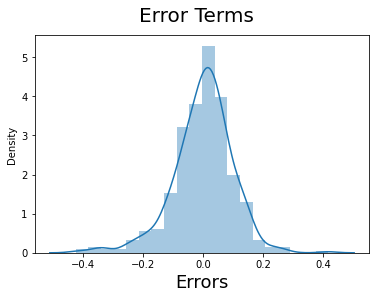

In [103]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label 

In [104]:
y_train_cnt

653    0.694385
576    0.808388
426    0.433782
728    0.435154
482    0.576685
         ...   
526    0.736831
578    0.826613
53     0.184304
350    0.286636
79     0.366718
Length: 510, dtype: float64

In [105]:
y_train

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
         ...   
526    0.764151
578    0.832835
53     0.218017
350    0.312586
79     0.236424
Name: cnt, Length: 510, dtype: float64

In [106]:
# Applying scaler() 
num_vars = ['temp','hum', 'windspeed', 'cnt']

# 2. fitting on data
bike_dt_test[num_vars] = scaler.transform(bike_dt_test[num_vars])

In [107]:
# test variables
y_test = bike_dt_test.pop('cnt')
X_test =  bike_dt_test

In [108]:
X_train_lm_11.drop(['const'],axis= 1, inplace=True)

In [109]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_lm_11.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [111]:
# Making predictions
y_pred = lm_11.predict(X_test_new)

Text(0, 0.5, 'y_pred')

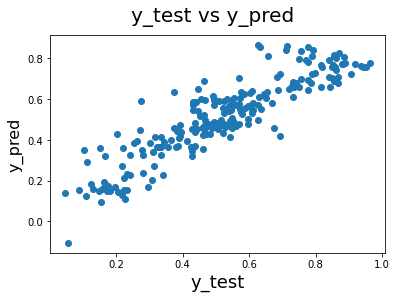

In [112]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

In [113]:
r2_score(y_test, y_pred)

0.7985644068080201

##We can see that the equation of our best fitted line is:

##cnt = 0.269 +235xyr -0.084xholiday +0.373xtemp -0.160xspring -0.287xlightsnow -0.075xmist